### Cab Industry EDA 

Time period of data is from 2016/01/02 to 2018/12/31.

Cab_Data.csv : This file includes details of transaction for 2 cab companies.

Customer_ID.csv : This is a mapping table that contains a unique identifier which links the customer’s demographic details.

Transaction_ID.csv : This is a mapping table that contains transaction to customer mapping and payment mode.

City.csv : This file contains list of US cities, their population and number of cab users.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

from pandas.api.types import CategoricalDtype
import statsmodels.api as sm
import statsmodels.formula.api as smf7

import datetime

In [2]:
cab_read = pd.read_csv("Cab_Data.csv")
cab_df = cab_read.copy()
cab_df = cab_df.dropna()
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
cab_df.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


Data of Travel column is corrected by date.

In [4]:
%%time
from datetime import datetime
import xlrd

cab_df["Date of Travel"] = cab_df["Date of Travel"].apply(lambda x: xlrd.xldate.xldate_as_datetime(x, 0))

Wall time: 972 ms


In [5]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
print("There are {} rows and {} columns".format(cab_df.shape[0], cab_df.shape[1]))

There are 359392 rows and 7 columns


In [7]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 21.9+ MB


In [8]:
cab_df.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

In [9]:
cab_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
KM Travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20


In [10]:
cab_df.describe(include = "all").T

<ipython-input-10-2e7e4ba039a4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cab_df.describe(include = "all").T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,NaN,NaN,NaN,NaT,NaT,10220761.185363,126805.803715,10000011.0,10110809.75,10221035.5,10330937.25,10440107.0
Date of Travel,359392,1095,2018-01-05 00:00:00,2022,2016-01-02,2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company,359392,2,Yellow Cab,274681,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,359392,19,NEW YORK NY,99885,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KM Travelled,359392.0,NaN,NaN,NaN,NaT,NaT,22.567254,12.233526,1.9,12.0,22.44,32.96,48.0
Price Charged,359392.0,NaN,NaN,NaN,NaT,NaT,423.443311,274.378911,15.6,206.4375,386.36,583.66,2048.03
Cost of Trip,359392.0,NaN,NaN,NaN,NaT,NaT,286.190113,157.993661,19.0,151.2,282.48,413.6832,691.2


In [11]:
cab_df.isnull().values.any()

False

In [12]:
cab_df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

#### Categorical Value "City"  

In [13]:
cab_df.City.unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [14]:
cab_df["City"].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [15]:
cab_df["City"].value_counts().count()

19

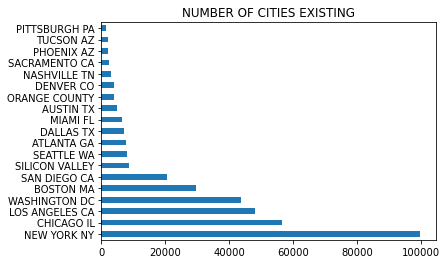

In [16]:
ax = cab_df["City"].value_counts().plot.barh();
ax.set_title("NUMBER OF CITIES EXISTING");

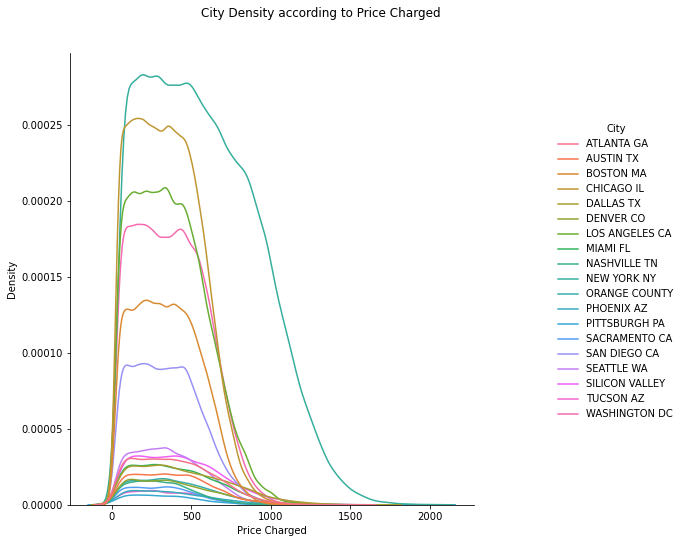

In [17]:
rp = sns.displot(data=cab_df,x="Price Charged",kind="kde",hue="City");
rp.fig.set_size_inches(10,8)
rp.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
rp.fig.suptitle("City Density according to Price Charged");


The city with the most numbers is New York.

#### Categorical Value "Company"  

In [18]:
cab_df.Company.unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [19]:
cab_df["Company"].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

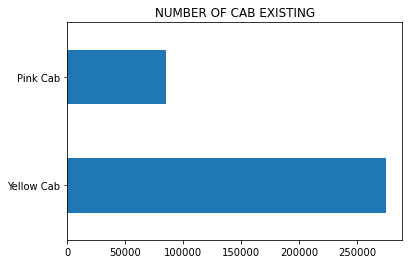

In [20]:
g1 = cab_value = cab_df["Company"].value_counts().plot.barh();
g1.set_title("NUMBER OF CAB EXISTING");
plt.rcParams["figure.figsize"] = (10,5)

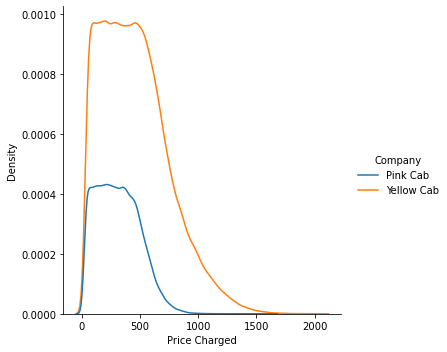

In [21]:
sns.displot(data=cab_df,x="Price Charged",kind="kde",hue="Company");

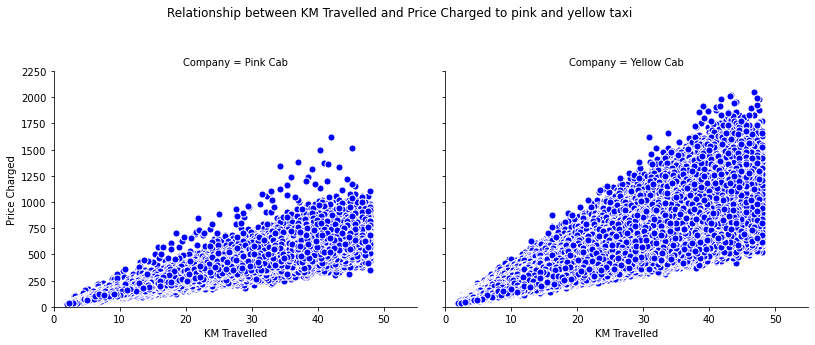

In [22]:
graphic = sns.FacetGrid(cab_df, col="Company", margin_titles=True, height=4)
graphic .map(plt.scatter, "KM Travelled", "Price Charged", color="blue", edgecolor="white", s=50, lw=1)
graphic .set(xlim=(0, 55), ylim=(0, 2250));
graphic.fig.set_size_inches(12,5)
graphic.fig.subplots_adjust(top=.8) 
graphic.fig.suptitle("Relationship between KM Travelled and Price Charged to pink and yellow taxi");

In terms of the KM Travelled and Price Charged, it is seen that the yellow taxi travels more.

### Dowloaded City.csv and EDA

In [23]:
city_read = pd.read_csv("City.csv")
city_df = city_read.copy()
city_df = city_df.dropna()
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [24]:
print("There are {} rows and {} columns".format(city_df.shape[0], city_df.shape[1]))

There are 20 rows and 3 columns


In [25]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 640.0+ bytes


In [26]:
city_df.dtypes

City          object
Population    object
Users         object
dtype: object

In [27]:
city_df["Users"] = city_df["Users"].replace(',','.', regex=True).astype(float)
city_df["Population"] = city_df["Population"].replace(',','', regex=True).astype(float)

In [28]:
city_df.dtypes

City           object
Population    float64
Users         float64
dtype: object

Users and Population values changed from object to float.

#### Continuous Variable Summaries

In [29]:
city_df1 = city_df.select_dtypes(include = ["float64"])

In [30]:
city_df1.describe(include = "all").T

,count,mean,std,min,25%,50%,75%,max
Population,20.0,1.231592e+06,1.740127e+06,248968.000,608637.25000,784559.000,1067041.000,8405837.000
Users,20.0,6.452065e+01,8.349938e+01,3.643,11.63325,23.429,91.766,302.149


In [31]:
city_df1.head()

,Population,Users
0,8405837.0,302.149
1,1955130.0,164.468
2,1595037.0,144.132
3,1339155.0,17.675
4,1177609.0,27.247


In [32]:
city_df1.isnull().values.any()

False

### Dowloaded Customer_ID.csv and EDA

In [33]:
customer_read = pd.read_csv("Customer_ID.csv")
customer_df = customer_read.copy()
customer_df = customer_df.dropna()
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [34]:
print("There are {} rows and {} columns".format(customer_df.shape[0], customer_df.shape[1]))

There are 49171 rows and 4 columns


In [35]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.9+ MB


In [36]:
customer_df.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [37]:
customer_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer ID,49171.0,NaN,NaN,NaN,28398.252283,17714.137333,1.0,12654.5,27631.0,43284.5,60000.0
Gender,49171,2,Male,26562,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,49171.0,NaN,NaN,NaN,35.363121,12.599066,18.0,25.0,33.0,42.0,65.0
Income (USD/Month),49171.0,NaN,NaN,NaN,15015.631856,8002.208253,2000.0,8289.5,14656.0,21035.0,35000.0


In [38]:
customer_df.isnull().values.any()

False

In [39]:
customer_df.rename(columns = {'Income (USD/Month)' : 'Customer_Income'}, inplace = True)
customer_df.head()

,Customer ID,Gender,Age,Customer_Income
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [40]:
customer_df["Gender"].value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

### Dowloaded Transaction_ID.csv and EDA

In [41]:
transaction_read = pd.read_csv("Transaction_ID.csv")
transaction_df = transaction_read.copy()
transaction_df = transaction_df.dropna()
transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [42]:
print("There are {} rows and {} columns".format(transaction_df.shape[0], transaction_df.shape[1]))

There are 440098 rows and 3 columns


In [43]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 13.4+ MB


In [44]:
transaction_df.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

### Merge All Csv Files 

In [45]:
df = pd.merge(cab_df, transaction_df, 
         on='Transaction ID', 
         how="inner") #remoted missing value
df.head()  

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   Customer ID     359392 non-null  int64         
 8   Payment_Mode    359392 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 27.4+ MB


In [47]:
df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Customer ID       0
Payment_Mode      0
dtype: int64

In [48]:
df1 = pd.merge(df, customer_df, 
         on='Customer ID', 
         how="inner") #remoted missing value
df1 = df1.copy()

df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Customer_Income
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Transaction ID   359392 non-null  int64         
 1   Date of Travel   359392 non-null  datetime64[ns]
 2   Company          359392 non-null  object        
 3   City             359392 non-null  object        
 4   KM Travelled     359392 non-null  float64       
 5   Price Charged    359392 non-null  float64       
 6   Cost of Trip     359392 non-null  float64       
 7   Customer ID      359392 non-null  int64         
 8   Payment_Mode     359392 non-null  object        
 9   Gender           359392 non-null  object        
 10  Age              359392 non-null  int64         
 11  Customer_Income  359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 35.6+ MB


In [50]:
df1.isnull().sum()

Transaction ID     0
Date of Travel     0
Company            0
City               0
KM Travelled       0
Price Charged      0
Cost of Trip       0
Customer ID        0
Payment_Mode       0
Gender             0
Age                0
Customer_Income    0
dtype: int64

In [51]:
df2 = pd.merge(df1, city_df, 
         on='City', 
         how="inner") #remoted missing value
all_df = df2.copy()

all_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Customer_Income,Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24.701
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24.701
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24.701
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24.701
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24.701


### all_df EDA

In [52]:
all_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Customer_Income,Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24.701
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24.701
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24.701
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24.701
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24.701


In [53]:
print("There are {} rows and {} columns".format(all_df.shape[0],all_df.shape[1]))

There are 359392 rows and 14 columns


In [54]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Transaction ID   359392 non-null  int64         
 1   Date of Travel   359392 non-null  datetime64[ns]
 2   Company          359392 non-null  object        
 3   City             359392 non-null  object        
 4   KM Travelled     359392 non-null  float64       
 5   Price Charged    359392 non-null  float64       
 6   Cost of Trip     359392 non-null  float64       
 7   Customer ID      359392 non-null  int64         
 8   Payment_Mode     359392 non-null  object        
 9   Gender           359392 non-null  object        
 10  Age              359392 non-null  int64         
 11  Customer_Income  359392 non-null  int64         
 12  Population       359392 non-null  float64       
 13  Users            359392 non-null  float64       
dtypes: datetime64[ns](1)

In [55]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,1.268058e+05,1.000001e+07,1.011081e+07,1.022104e+07,1.033094e+07,1.044011e+07
KM Travelled,359392.0,2.256725e+01,1.223353e+01,1.900000e+00,1.200000e+01,2.244000e+01,3.296000e+01,4.800000e+01
Price Charged,359392.0,4.234433e+02,2.743789e+02,1.560000e+01,2.064375e+02,3.863600e+02,5.836600e+02,2.048030e+03
Cost of Trip,359392.0,2.861901e+02,1.579937e+02,1.900000e+01,1.512000e+02,2.824800e+02,4.136832e+02,6.912000e+02
Customer ID,359392.0,1.919165e+04,2.101241e+04,1.000000e+00,2.705000e+03,7.459000e+03,3.607800e+04,6.000000e+04
Age,359392.0,3.533670e+01,1.259423e+01,1.800000e+01,2.500000e+01,3.300000e+01,4.200000e+01,6.500000e+01
Customer_Income,359392.0,1.504882e+04,7.969409e+03,2.000000e+03,8.424000e+03,1.468500e+04,2.103500e+04,3.500000e+04
Population,359392.0,3.132198e+06,3.315194e+06,2.489680e+05,6.712380e+05,1.595037e+06,8.405837e+06,8.405837e+06
Users,359392.0,1.583656e+02,1.008501e+02,3.643000e+00,8.002100e+01,1.441320e+02,3.021490e+02,3.021490e+02


In [56]:
df1.isnull().sum()

Transaction ID     0
Date of Travel     0
Company            0
City               0
KM Travelled       0
Price Charged      0
Cost of Trip       0
Customer ID        0
Payment_Mode       0
Gender             0
Age                0
Customer_Income    0
dtype: int64

### Categorical Values Examination

In [57]:
all_df["City"].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

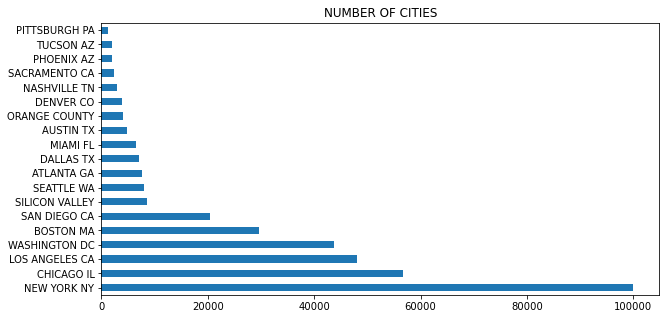

In [58]:
g2 = all_df["City"].value_counts().plot.barh();
g2.set_title("NUMBER OF CITIES");
plt.rcParams["figure.figsize"] = (10,5)

SILICON VALLEY and ORANGE COUNTY are cities of CA state. This cities has been renamed as SILICON_VALLEY CA and ORANGE_COUNTY CA. 

In [59]:
all_df["City"] = all_df["City"].replace(["SILICON VALLEY"],"SILICON_VALLEY CA")
all_df["City"] = all_df["City"].replace(["ORANGE COUNTY"],"ORANGE_COUNTY CA")

In [60]:
all_df["City"].value_counts()

NEW YORK NY          99885
CHICAGO IL           56625
LOS ANGELES CA       48033
WASHINGTON DC        43737
BOSTON MA            29692
SAN DIEGO CA         20488
SILICON_VALLEY CA     8519
SEATTLE WA            7997
ATLANTA GA            7557
DALLAS TX             7017
MIAMI FL              6454
AUSTIN TX             4896
ORANGE_COUNTY CA      3982
DENVER CO             3825
NASHVILLE TN          3010
SACRAMENTO CA         2367
PHOENIX AZ            2064
TUCSON AZ             1931
PITTSBURGH PA         1313
Name: City, dtype: int64

We arrange cities before we can sort

In [61]:
all_df["City"] = all_df["City"].replace(["NEW YORK NY"],"NEW_YORK NY")
all_df["City"] = all_df["City"].replace(["LOS ANGELES CA"],"LOS_ANGELES CA")
all_df["City"] = all_df["City"].replace(["SAN DIEGO CA"],"SAN_DIEGO CA")



In [62]:
all_df["States"] = all_df["City"].apply(lambda x: x.split(" ")[1])
all_df["States"].value_counts()

NY    99885
CA    83389
IL    56625
DC    43737
MA    29692
TX    11913
WA     7997
GA     7557
FL     6454
AZ     3995
CO     3825
TN     3010
PA     1313
Name: States, dtype: int64

In [63]:
all_df.isnull().sum()

Transaction ID     0
Date of Travel     0
Company            0
City               0
KM Travelled       0
Price Charged      0
Cost of Trip       0
Customer ID        0
Payment_Mode       0
Gender             0
Age                0
Customer_Income    0
Population         0
Users              0
States             0
dtype: int64

In [64]:
all_df.rename({"City": "States_Cities"}, axis=1, inplace=True) #rename "City" column.
all_df

,Transaction ID,Date of Travel,Company,States_Cities,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Customer_Income,Population,Users,States
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24.701,GA
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24.701,GA
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24.701,GA
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24.701,GA
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24.701,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859.0,127.001,DC
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859.0,127.001,DC
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859.0,127.001,DC
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859.0,127.001,DC


In [65]:
all_df["Cities"] = all_df["States_Cities"].apply(lambda x: x.split(" ")[0])
all_df["Cities"].value_counts()

NEW_YORK          99885
CHICAGO           56625
LOS_ANGELES       48033
WASHINGTON        43737
BOSTON            29692
SAN_DIEGO         20488
SILICON_VALLEY     8519
SEATTLE            7997
ATLANTA            7557
DALLAS             7017
MIAMI              6454
AUSTIN             4896
ORANGE_COUNTY      3982
DENVER             3825
NASHVILLE          3010
SACRAMENTO         2367
PHOENIX            2064
TUCSON             1931
PITTSBURGH         1313
Name: Cities, dtype: int64

In [66]:
for col in all_df.columns:
    if ' ' in col:
        all_df = all_df.rename(columns={col:col.replace(' ','_')})
all_df

,Transaction_ID,Date_of_Travel,Company,States_Cities,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Customer_Income,Population,Users,States,Cities
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24.701,GA,ATLANTA
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24.701,GA,ATLANTA
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24.701,GA,ATLANTA
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24.701,GA,ATLANTA
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24.701,GA,ATLANTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859.0,127.001,DC,WASHINGTON
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859.0,127.001,DC,WASHINGTON
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859.0,127.001,DC,WASHINGTON
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859.0,127.001,DC,WASHINGTON


### Outlier Capture

In [67]:
all_df1 = all_df.copy()
all_df1 = all_df.select_dtypes(include = ["float", "int64"])
all_df1

,Transaction_ID,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Age,Customer_Income,Population,Users
0,10000011,30.45,370.95,313.6350,29290,28,10813,814885.0,24.701
1,10351127,26.19,598.70,317.4228,29290,28,10813,814885.0,24.701
2,10412921,42.55,792.05,597.4020,29290,28,10813,814885.0,24.701
3,10000012,28.62,358.52,334.8540,27703,27,9237,814885.0,24.701
4,10320494,36.38,721.10,467.1192,27703,27,9237,814885.0,24.701
...,...,...,...,...,...,...,...,...,...
359387,10307228,38.40,668.93,525.3120,51406,29,6829,418859.0,127.001
359388,10319775,3.57,67.60,44.5536,51406,29,6829,418859.0,127.001
359389,10347676,23.46,331.97,337.8240,51406,29,6829,418859.0,127.001
359390,10358624,27.60,358.23,364.3200,51406,29,6829,418859.0,127.001


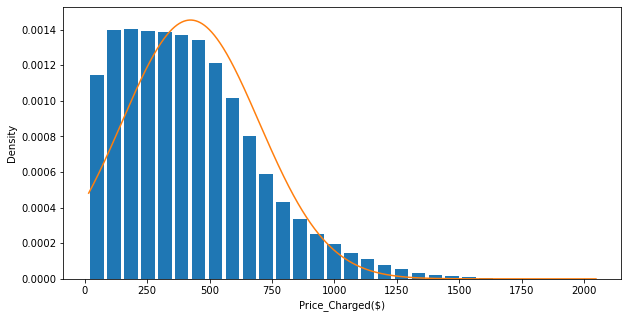

In [68]:
from scipy.stats import norm
plt.hist(all_df1.Price_Charged, bins=30, rwidth=0.8, density= True)
plt.xlabel("Price_Charged($)")
plt.ylabel("Density")

rng = np.arange(all_df1.Price_Charged.min(), all_df1.Price_Charged.max(), 0.1)
plt.plot(rng, norm.pdf(rng, all_df1.Price_Charged.mean(), all_df1.Price_Charged.std()));


C:\Users\melis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


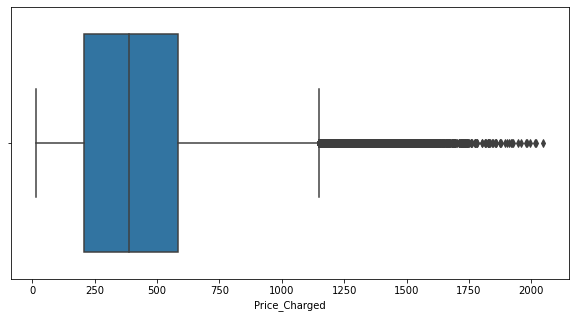

In [69]:
sns.boxplot(all_df1.Price_Charged); #outlier situation

In [70]:
max_threshold = all_df1["Price_Charged"].quantile(0.75)
min_threshold = all_df1["Price_Charged"].quantile(0.25)
IQR = max_threshold-min_threshold
IQR

377.22249999999997

In [71]:
max_threshold = all_df1["Price_Charged"].quantile(0.75)
max_threshold

583.66

In [72]:
min_threshold = all_df1["Price_Charged"].quantile(0.25)
min_threshold

206.4375

In [73]:
lower_bound = min_threshold-1.5*IQR
upper_bound = max_threshold+1.5*IQR
lower_bound  

-359.39625

In [74]:
upper_bound

1149.49375

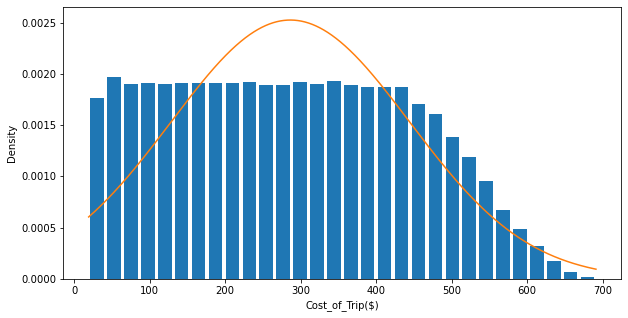

In [75]:
from scipy.stats import norm
plt.hist(all_df1.Cost_of_Trip, bins=30, rwidth=0.8, density= True)
plt.xlabel("Cost_of_Trip($)")
plt.ylabel("Density")

rng = np.arange(all_df1.Cost_of_Trip.min(), all_df1.Cost_of_Trip.max(), 0.1)
plt.plot(rng, norm.pdf(rng, all_df1.Cost_of_Trip.mean(), all_df1.Cost_of_Trip.std()));

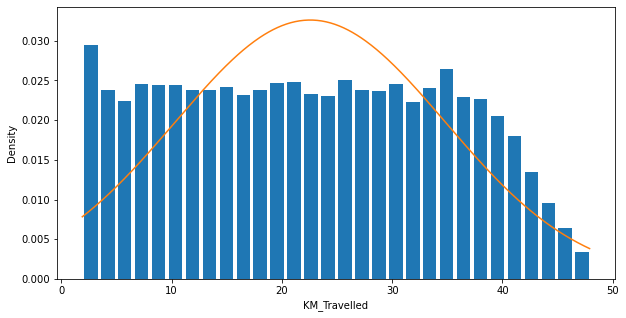

In [76]:
from scipy.stats import norm
plt.hist(all_df1.KM_Travelled, bins=30, rwidth=0.8, density= True)
plt.xlabel("KM_Travelled")
plt.ylabel("Density")

rng = np.arange(all_df1.KM_Travelled.min(), all_df1.KM_Travelled.max(), 0.1)
plt.plot(rng, norm.pdf(rng, all_df1.KM_Travelled.mean(), all_df1.KM_Travelled.std()));

#### Add Years, Months and Years_Months Columns

In [77]:
all_data = all_df.copy()
all_data['Years'] = pd.DatetimeIndex(all_data['Date_of_Travel']).year
all_data['Months_Number'] = pd.DatetimeIndex(all_data['Date_of_Travel']).month
all_data['Years_Months'] = pd.to_datetime(all_data['Date_of_Travel']).dt.to_period('M')

all_data.head()

,Transaction_ID,Date_of_Travel,Company,States_Cities,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Customer_Income,Population,Users,States,Cities,Years,Months_Number,Years_Months
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24.701,GA,ATLANTA,2016,1,2016-01
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24.701,GA,ATLANTA,2018,7,2018-07
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24.701,GA,ATLANTA,2018,11,2018-11
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24.701,GA,ATLANTA,2016,1,2016-01
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24.701,GA,ATLANTA,2018,4,2018-04


In [78]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Transaction_ID   359392 non-null  int64         
 1   Date_of_Travel   359392 non-null  datetime64[ns]
 2   Company          359392 non-null  object        
 3   States_Cities    359392 non-null  object        
 4   KM_Travelled     359392 non-null  float64       
 5   Price_Charged    359392 non-null  float64       
 6   Cost_of_Trip     359392 non-null  float64       
 7   Customer_ID      359392 non-null  int64         
 8   Payment_Mode     359392 non-null  object        
 9   Gender           359392 non-null  object        
 10  Age              359392 non-null  int64         
 11  Customer_Income  359392 non-null  int64         
 12  Population       359392 non-null  float64       
 13  Users            359392 non-null  float64       
 14  States           359

In [79]:
d = {1:"JAN", 2:"FEB", 3:'MAR', 4:"APR",
    5:"MAY", 6:"JUN", 7:"JULY", 8:"AUG",
    9: "SEP", 10:"OCT",11:"NOV", 12:"DEC"}

all_data["Months"] = all_data.Months_Number.map(d)

all_data.head()

,Transaction_ID,Date_of_Travel,Company,States_Cities,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Customer_Income,Population,Users,States,Cities,Years,Months_Number,Years_Months,Months
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24.701,GA,ATLANTA,2016,1,2016-01,JAN
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24.701,GA,ATLANTA,2018,7,2018-07,JULY
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24.701,GA,ATLANTA,2018,11,2018-11,NOV
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24.701,GA,ATLANTA,2016,1,2016-01,JAN
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24.701,GA,ATLANTA,2018,4,2018-04,APR


#### Add Profit Column

In [80]:
all_data["Profit"] = all_data["Price_Charged"] - all_data["Cost_of_Trip"]   
all_data.head()

,Transaction_ID,Date_of_Travel,Company,States_Cities,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,...,Customer_Income,Population,Users,States,Cities,Years,Months_Number,Years_Months,Months,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,...,10813,814885.0,24.701,GA,ATLANTA,2016,1,2016-01,JAN,57.3150
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,...,10813,814885.0,24.701,GA,ATLANTA,2018,7,2018-07,JULY,281.2772
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,...,10813,814885.0,24.701,GA,ATLANTA,2018,11,2018-11,NOV,194.6480
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,...,9237,814885.0,24.701,GA,ATLANTA,2016,1,2016-01,JAN,23.6660
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,...,9237,814885.0,24.701,GA,ATLANTA,2018,4,2018-04,APR,253.9808


In [81]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Transaction_ID   359392 non-null  int64         
 1   Date_of_Travel   359392 non-null  datetime64[ns]
 2   Company          359392 non-null  object        
 3   States_Cities    359392 non-null  object        
 4   KM_Travelled     359392 non-null  float64       
 5   Price_Charged    359392 non-null  float64       
 6   Cost_of_Trip     359392 non-null  float64       
 7   Customer_ID      359392 non-null  int64         
 8   Payment_Mode     359392 non-null  object        
 9   Gender           359392 non-null  object        
 10  Age              359392 non-null  int64         
 11  Customer_Income  359392 non-null  int64         
 12  Population       359392 non-null  float64       
 13  Users            359392 non-null  float64       
 14  States           359

#### Q1 : What was the best month for profit? How much was earned that month?

C:\Users\melis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


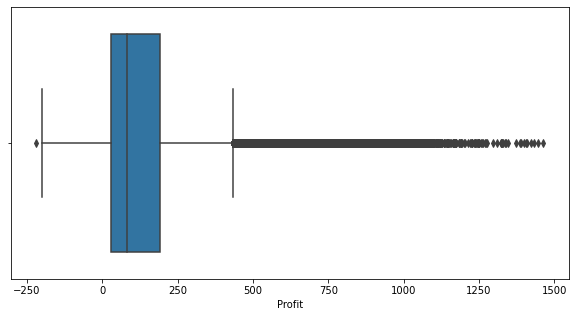

In [82]:
sns.boxplot(all_data.Profit);

Median calculate because profit outlier situation.

In [83]:
q1 =all_data.copy()
q1 = q1.groupby(["Months_Number"]).median()[["Profit"]]
q1


,Profit
Months_Number,
1,107.5186
2,110.8420
3,97.7770
4,94.2310
5,103.3200
6,89.7884
7,57.9110
8,57.3088
9,76.2468


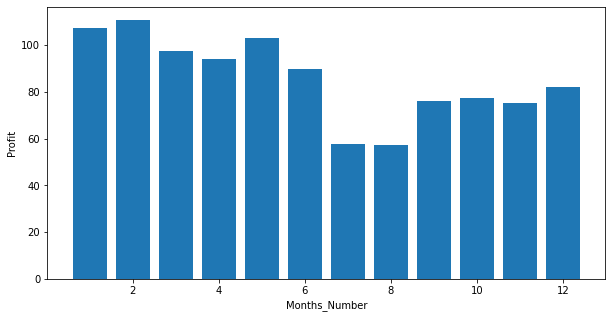

In [84]:
months = range(1,13)
results = q1.groupby("Months_Number").mean()
plt.bar(months, results["Profit"])
plt.ylabel("Profit")
plt.xlabel("Months_Number")

plt.show();

As you see the biggest profit sum of all years is in Feb month. 

#### Q2: Which city had the highest number of profit?

In [85]:
q2 = all_data.copy()
q2.groupby(["Cities"]).median()[["Profit"]]

,Profit
Cities,
ATLANTA,82.0000
AUSTIN,77.4128
BOSTON,41.6014
CHICAGO,39.3420
DALLAS,124.3984
DENVER,72.0564
LOS_ANGELES,64.1808
MIAMI,81.9622
NASHVILLE,28.6190


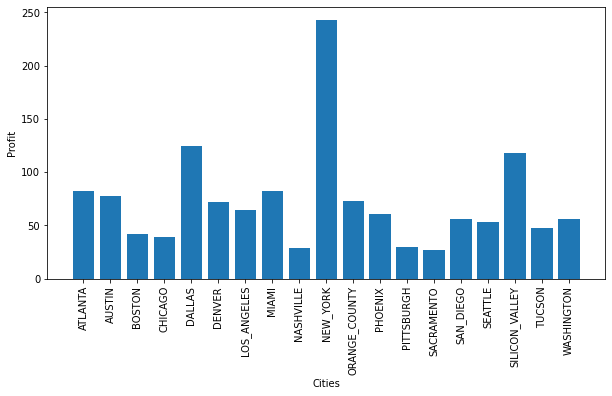

In [86]:
city = q2["Cities"].unique()
q2 = q2.groupby(["Cities"]).median()[["Profit"]]

plt.bar(city, q2["Profit"])
plt.xticks(city, rotation="vertical", size=10)
plt.ylabel("Profit")
plt.xlabel("Cities")
plt.show();

New York city is the most profitable city.

#### Q3: Which city had the highest number of profit?

In [87]:
q3 = all_data.copy()
q3.groupby(["States"]).median()[["Profit"]]

,Profit
States,
AZ,53.8080
CA,64.9948
CO,72.0564
DC,56.4180
FL,81.9622
GA,82.0000
IL,39.3420
MA,41.6014
NY,242.8740


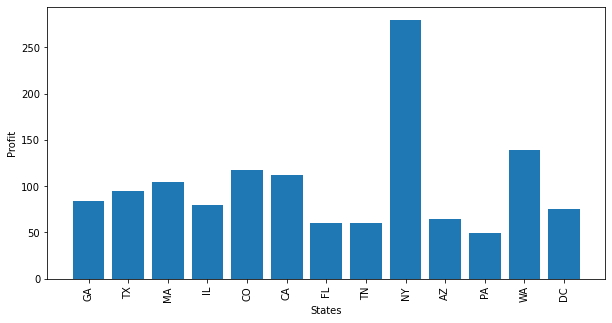

In [88]:
city = q3["States"].unique()
q3 = q3.groupby(["States"]).mean()[["Profit"]]

plt.bar(city, q3["Profit"])
plt.xticks(city, rotation="vertical", size=10)
plt.ylabel("Profit")
plt.xlabel("States")
plt.show();

New York city is the most profitable state.

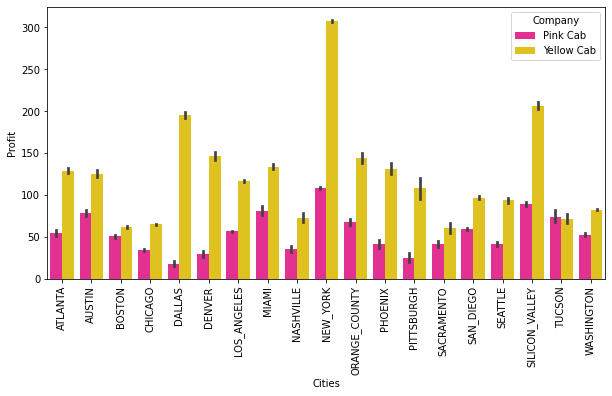

In [89]:
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
plt.figure(figsize = (10,5))
cities_ = sns.barplot(x="Cities",y="Profit", hue="Company", data=all_data);
plt.setp(cities_.get_xticklabels(), rotation=90);

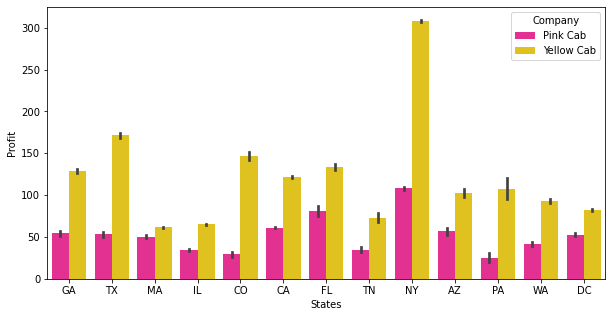

In [90]:
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
plt.figure(figsize = (10,5))
sns.barplot(x="States",y="Profit", hue="Company", data=all_data);

I realized that the graphs above are misleading. Because in the case of "profit" it actually has negative values.

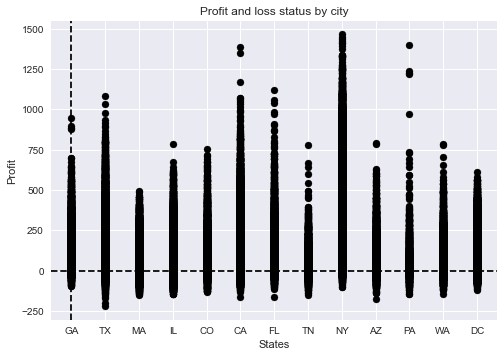

In [91]:
plt.style.use("seaborn")
plt.scatter(x="States", y="Profit", c="black" ,data=all_data)
  

plt.axvline(0, c="black", ls="--")
plt.axhline(0, c="black", ls="--")
  

plt.xlabel("States")
plt.ylabel("Profit")
  

plt.title("Profit and loss status by city")
plt.show()

#### Q4: How much profit does each firm generate by gender?

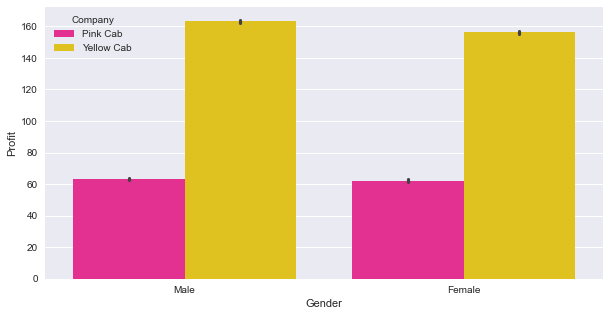

In [95]:
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
plt.figure(figsize = (10,5))
sns.barplot(x="Gender", y="Profit", hue="Company", data=all_data);

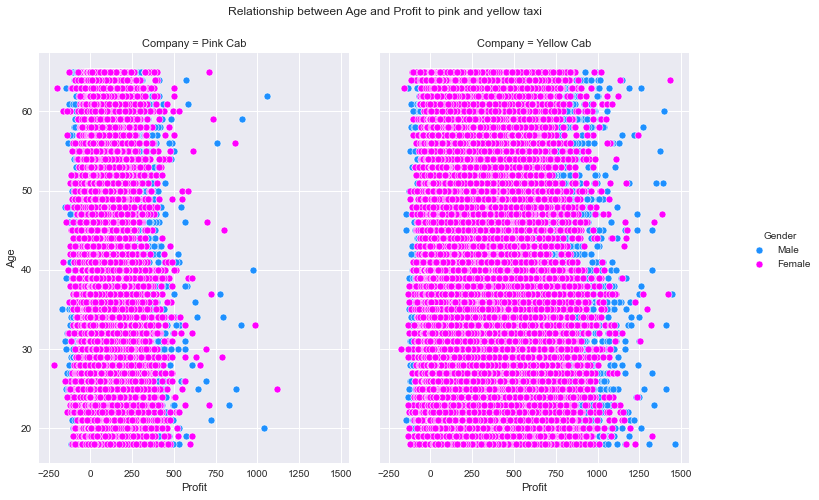

In [93]:
color = ["dodgerblue", "fuchsia"]
sns.set_palette(sns.color_palette(color))
g = sns.FacetGrid(all_data, col="Company", hue = "Gender")
g.map(sns.scatterplot, "Profit", "Age")
g.add_legend();
g.fig.set_size_inches(12,8)
g.fig.subplots_adjust(top=.9) 
g.fig.suptitle("Relationship between Age and Profit to pink and yellow taxi");

Wall time: 12.3 s


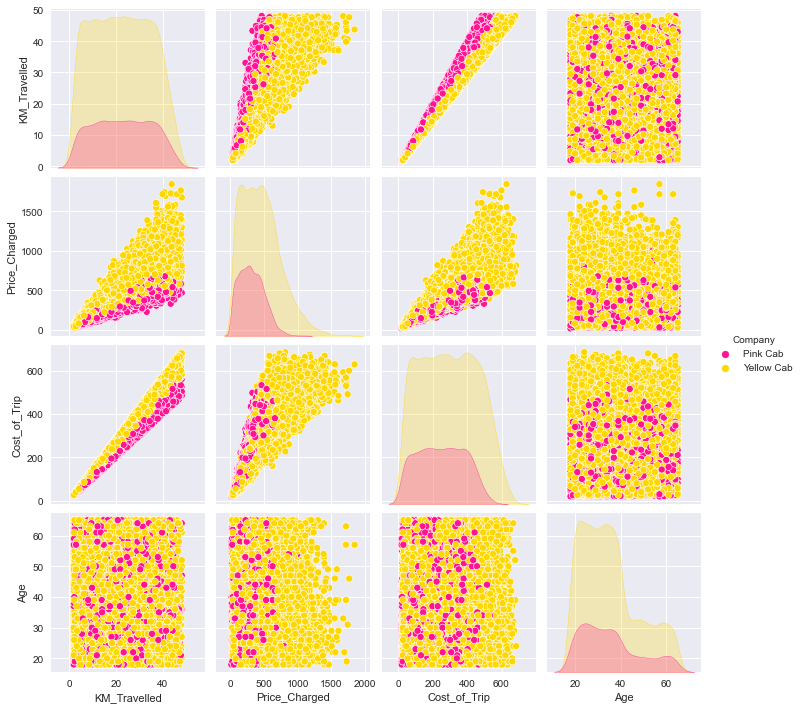

In [96]:
%%time
q7 = all_data[["KM_Travelled",
               "Price_Charged",
               "Cost_of_Trip",
               "Age",
               "Company"]].sample(frac = 0.05, random_state = 42);
sns.pairplot(q7, hue="Company", hue_order = ["Pink Cab", "Yellow Cab"], height = 2.5);

It is seen that the yellow taxi is more dominant in general.

<AxesSubplot:xlabel='Company', ylabel='Population'>

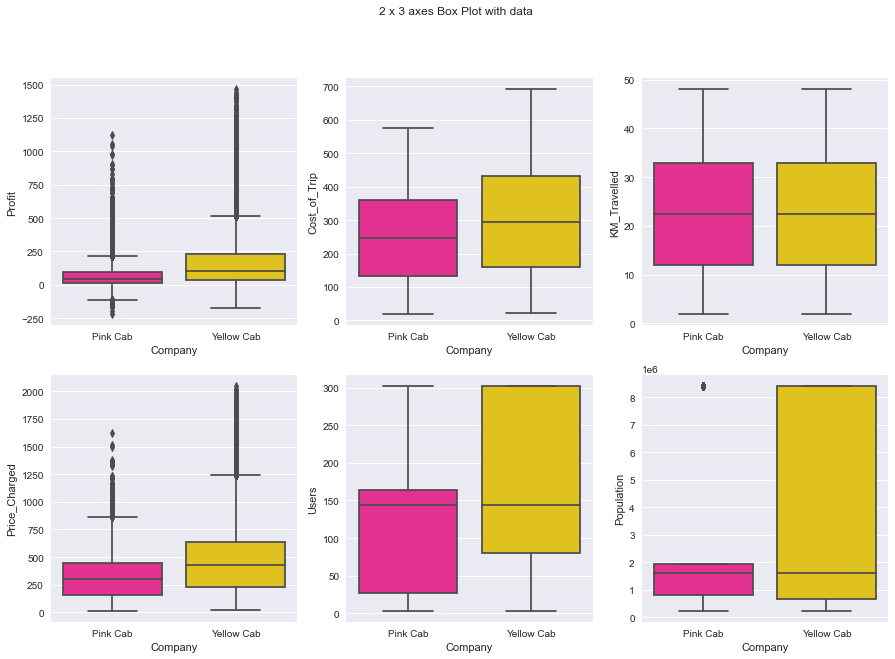

In [97]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
  
fig.suptitle("2 x 3 axes Box Plot with data");
  
sns.boxplot(ax=axes[0, 0], data=all_data, x="Company", y="Profit")
sns.boxplot(ax=axes[0, 1], data=all_data, x="Company", y="Cost_of_Trip")
sns.boxplot(ax=axes[0, 2], data=all_data, x="Company", y="KM_Travelled")
sns.boxplot(ax=axes[1, 0], data=all_data, x="Company", y="Price_Charged")
sns.boxplot(ax=axes[1, 1], data=all_data, x="Company", y="Users")
sns.boxplot(ax=axes[1, 2], data=all_data, x="Company", y="Population")


In [98]:
grouped=all_data.groupby(["Cities","Company"])
grouped.size().head()


Cities   Company   
ATLANTA  Pink Cab      1762
         Yellow Cab    5795
AUSTIN   Pink Cab      1868
         Yellow Cab    3028
BOSTON   Pink Cab      5186
dtype: int64

In [99]:
q6 = all_data.groupby(["States", "Company"]).size().reset_index().rename(columns = {0 : "Cab_Count"})
q6.head()

,States,Company,Cab_Count
0,AZ,Pink Cab,1663
1,AZ,Yellow Cab,2332
2,CA,Pink Cab,37181
3,CA,Yellow Cab,46208
4,CO,Pink Cab,1394


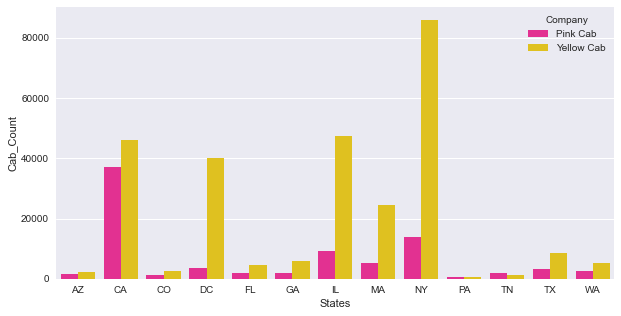

In [100]:
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
plt.figure(figsize = (10,5))
sns.barplot(x="States", y="Cab_Count", hue="Company", data=q6);

In [101]:
grouped1=all_data.groupby(["Cities","Payment_Mode"])
grouped1.size().head()


Cities   Payment_Mode
ATLANTA  Card             4513
         Cash             3044
AUSTIN   Card             2980
         Cash             1916
BOSTON   Card            17741
dtype: int64

In [102]:
q7 = all_data.groupby(["States","Payment_Mode"]).size().reset_index().rename(columns = {0 : "Pay_Mode_Count"})
q7.head()

,States,Payment_Mode,Pay_Mode_Count
0,AZ,Card,2443
1,AZ,Cash,1552
2,CA,Card,50091
3,CA,Cash,33298
4,CO,Card,2328


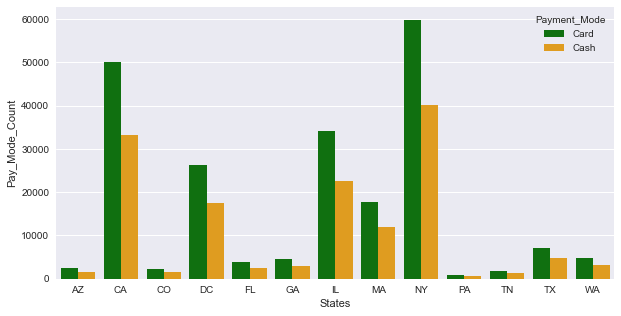

In [103]:
color = ["green","orange"]
sns.set_palette(sns.color_palette(color))
plt.figure(figsize = (10,5))
sns.barplot(x="States", y="Pay_Mode_Count", hue="Payment_Mode", data=q7);

Paying by card is high in NY and CA

## Statistical Analysis

In [104]:
all_data.head()

,Transaction_ID,Date_of_Travel,Company,States_Cities,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,...,Customer_Income,Population,Users,States,Cities,Years,Months_Number,Years_Months,Months,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,...,10813,814885.0,24.701,GA,ATLANTA,2016,1,2016-01,JAN,57.3150
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,...,10813,814885.0,24.701,GA,ATLANTA,2018,7,2018-07,JULY,281.2772
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,...,10813,814885.0,24.701,GA,ATLANTA,2018,11,2018-11,NOV,194.6480
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,...,9237,814885.0,24.701,GA,ATLANTA,2016,1,2016-01,JAN,23.6660
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,...,9237,814885.0,24.701,GA,ATLANTA,2018,4,2018-04,APR,253.9808


In [105]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Transaction_ID   359392 non-null  int64         
 1   Date_of_Travel   359392 non-null  datetime64[ns]
 2   Company          359392 non-null  object        
 3   States_Cities    359392 non-null  object        
 4   KM_Travelled     359392 non-null  float64       
 5   Price_Charged    359392 non-null  float64       
 6   Cost_of_Trip     359392 non-null  float64       
 7   Customer_ID      359392 non-null  int64         
 8   Payment_Mode     359392 non-null  object        
 9   Gender           359392 non-null  object        
 10  Age              359392 non-null  int64         
 11  Customer_Income  359392 non-null  int64         
 12  Population       359392 non-null  float64       
 13  Users            359392 non-null  float64       
 14  States           359

In [106]:
!pip install researchpy
import researchpy as rp

In [107]:
rp.summary_cont(all_data[["KM_Travelled","Price_Charged","Cost_of_Trip","Profit"]]) 
#numeric variable

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,KM_Travelled,359392.0,22.5673,12.2335,0.0204,22.5273,22.6073
1,Price_Charged,359392.0,423.4433,274.3789,0.4577,422.5463,424.3404
2,Cost_of_Trip,359392.0,286.1901,157.9937,0.2635,285.6736,286.7067
3,Profit,359392.0,137.2532,160.3118,0.2674,136.7291,137.7773


In [108]:
import scipy.stats as stats
import pylab

In [109]:
stats.describe(all_data["Price_Charged"])

DescribeResult(nobs=359392, minmax=(15.6, 2048.03), mean=423.4433112590153, variance=75283.78704639869, skewness=0.8737578448085501, kurtosis=0.7476083770138593)

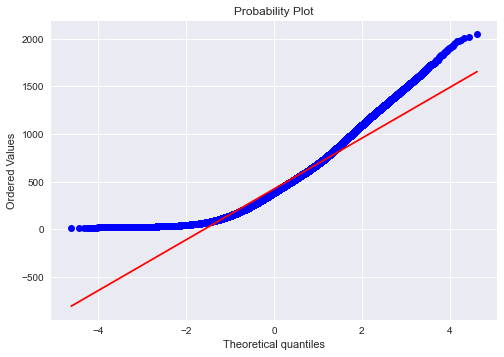

In [110]:
stats.probplot(all_data["Price_Charged"], dist="norm", plot=pylab)
pylab.show()

In [111]:
stats.describe(all_data["Cost_of_Trip"])

DescribeResult(nobs=359392, minmax=(19.0, 691.2), mean=286.19011282443677, variance=24961.996964134534, skewness=0.13795748511098127, kurtosis=-1.0122353643193263)

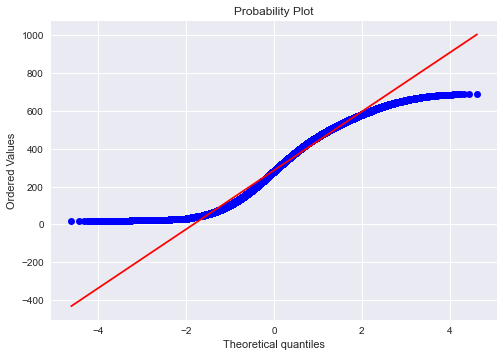

In [112]:
stats.probplot(all_data["Cost_of_Trip"], dist="norm", plot=pylab)
pylab.show()

In [113]:
stats.describe(all_data["Profit"])

DescribeResult(nobs=359392, minmax=(-220.06, 1463.9660000000003), mean=137.25319843457842, variance=25699.88591852702, skewness=1.8998960015626842, kurtosis=4.376834715546553)

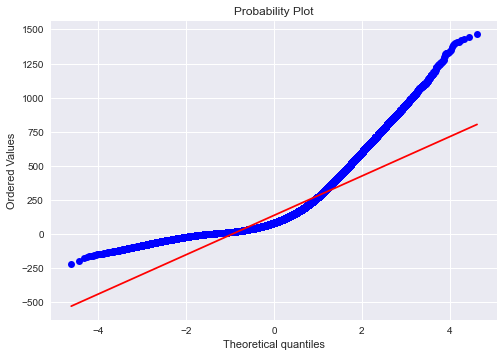

In [114]:
import pylab
stats.probplot(all_data["Profit"], dist="norm", plot=pylab)
pylab.show()

In [115]:
from scipy.stats import shapiro


In [116]:
shapiro(all_data["Price_Charged"])

C:\Users\melis\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9465863108634949, pvalue=0.0)

In [117]:
stats.ttest_1samp(all_data["Price_Charged"], popmean=500)

Ttest_1sampResult(statistic=-167.26944461251136, pvalue=0.0)

In [118]:
from scipy.stats import kruskal
kruskal(all_data["Price_Charged"], all_data["Cost_of_Trip"],all_data["Profit"])

KruskalResult(statistic=305580.54944824, pvalue=0.0)

### Correlation Analysis

In [119]:
all_data1 = all_data.copy()
_df = all_data[["KM_Travelled", "Price_Charged", "Cost_of_Trip", "Profit"]]
_df

,KM_Travelled,Price_Charged,Cost_of_Trip,Profit
0,30.45,370.95,313.6350,57.3150
1,26.19,598.70,317.4228,281.2772
2,42.55,792.05,597.4020,194.6480
3,28.62,358.52,334.8540,23.6660
4,36.38,721.10,467.1192,253.9808
...,...,...,...,...
359387,38.40,668.93,525.3120,143.6180
359388,3.57,67.60,44.5536,23.0464
359389,23.46,331.97,337.8240,-5.8540
359390,27.60,358.23,364.3200,-6.0900


In [120]:
_df.isnull().values.any()

False

In [121]:
_df.describe().T

,count,mean,std,min,25%,50%,75%,max
KM_Travelled,359392.0,22.567254,12.233526,1.90,12.0000,22.440,32.9600,48.000
Price_Charged,359392.0,423.443311,274.378911,15.60,206.4375,386.360,583.6600,2048.030
Cost_of_Trip,359392.0,286.190113,157.993661,19.00,151.2000,282.480,413.6832,691.200
Profit,359392.0,137.253198,160.311840,-220.06,28.0120,81.962,190.0300,1463.966


In [122]:
_df.corr()

,KM_Travelled,Price_Charged,Cost_of_Trip,Profit
KM_Travelled,1.000000,0.835753,0.981848,0.462768
Price_Charged,0.835753,1.000000,0.859812,0.864154
Cost_of_Trip,0.981848,0.859812,1.000000,0.486056
Profit,0.462768,0.864154,0.486056,1.000000


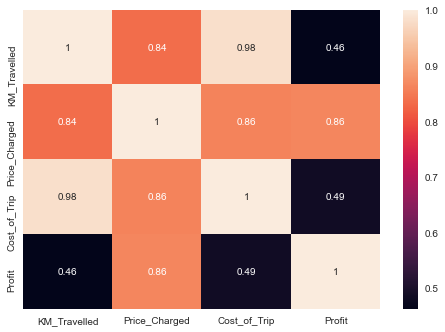

In [123]:
sns.heatmap(_df.corr(), annot = True);

### Conclusion

It is seen that the profit situation has decreased to negative in some cities.
The number of yellow taxis is considerably higher than the number of pink taxis. Therefore, it is seen that the yellow taxi is dominant. In conclution company XYZ should invest in the yellow taxi.